In [35]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import is3_broker_rl
import matplotlib.pyplot as plt
from pathlib import Path

In [36]:
DATA_DIR = Path(is3_broker_rl.__file__).parent.parent / "data"

In [37]:
# Papermill parameter cell
# Name of the directory to analyse. Should contain consumption_action.csv and consumption_reward.csv.
ANALYSIS_DIR_NAME = ""
COMMENTS = ""


In [38]:
print(COMMENTS)

In [39]:
#path = "../data/"
reward_prefix = "wholesale_reward.csv"

In [40]:
ANALYSIS_DIR = DATA_DIR / ANALYSIS_DIR_NAME

### Reward analysis

In [41]:
df_reward = pd.read_csv(os.path.join(ANALYSIS_DIR,reward_prefix))


In [42]:
# Fixes the issue that the experiment scheduler always assigns the same gameId
def write_unique_game_id(df):
    new_game_start_indices = df[df["timeslot"] < df["timeslot"].shift()].index
    if len(new_game_start_indices) > 0:
        df.loc[: new_game_start_indices[0], "gameId"] = f"game0"
        for i in range(len(new_game_start_indices) - 1):
            df.loc[new_game_start_indices[i] : new_game_start_indices[i + 1], "gameId"] = f"game{i + 1}"
        df.loc[new_game_start_indices[-1] :, "gameId"] = f"game{len(new_game_start_indices)}"

In [43]:
def min_max_scaler(series):
    return (series - series.min()) / (series.max() - series.min())

In [44]:

df_reward.dropna(inplace=True) # Drop first few timesteps that have no action. 
df_reward2 = df_reward["observation"].apply(json.loads)
col_names = list(df_reward2.iloc[0].keys())
df_reward2 = df_reward2.apply(lambda x: list(x.values()))
temp_list = []
for row in df_reward2:

    temp_list.append(row)

temp_df = pd.DataFrame(temp_list, columns=col_names)

temp_merge_df = pd.DataFrame()
temp_name = []
for column in temp_df.columns:
    if type(temp_df[column].iloc[0]) == list:
        temp_df2 = temp_df[column].apply(pd.Series)
        i=0
        for column2 in temp_df2:
            temp_merge_df[f"{column}_{i}"] = temp_df2[column2]
            i+=1
            
        
    else:
        temp_merge_df[column] = temp_df[column]
    
col_names = []
price = []
energy = []
for i in range(24):
    col_names.append(f"energy_{i+1}")
    col_names.append(f"price_{i+1}")
    price.append(f"price_{i+1}")
    energy.append(f"energy_{i+1}")




/tmp/ipykernel_23986/1597897593.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_merge_df[f"{column}_{i}"] = temp_df2[column2]
/tmp/ipykernel_23986/1597897593.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_merge_df[f"{column}_{i}"] = temp_df2[column2]
/tmp/ipykernel_23986/1597897593.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get

In [45]:
df_action = df_reward.apply(lambda x: x["last_action"].split(";"), result_type="expand", axis=1).drop(0, axis=1)
df_action = df_action.astype(float)
df_action.columns = col_names
action_observation_reward_df = pd.concat([df_action,temp_merge_df, df_reward[["reward", "balancing_reward", "wholesale_reward","shaped_return","sum_mWh", "tariff_reward"]]],axis=1)
write_unique_game_id(action_observation_reward_df)
df = action_observation_reward_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5004 entries, 0 to 5003
Columns: 353 entries, energy_1 to tariff_reward
dtypes: float64(350), int64(2), object(1)
memory usage: 13.5+ MB


In [121]:
#df = df.iloc[2200:2500]

In [46]:
df[df["customer_count"].shift(1) -df["customer_count"] > 8000 | (df["customer_count"].shift(1) -df["customer_count"] < 8000)]["customer_count"]

18      55088
24      53306
30      52911
65      54983
71      53289
        ...  
4957    51060
4963    50846
4969    50733
4975    50642
4981    50615
Name: customer_count, Length: 353, dtype: int64

In [47]:
df.iloc[5300:8000][["customer_count","reward","balancing_reward", "wholesale_reward","shaped_return","customer_count"]].tail(5)

,customer_count,reward,balancing_reward,wholesale_reward,shaped_return,customer_count


In [48]:
df

,energy_1,price_1,energy_2,price_2,energy_3,price_3,energy_4,price_4,energy_5,price_5,...,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,reward,balancing_reward,wholesale_reward,shaped_return,sum_mWh,tariff_reward
0,-3.864920,7.032919,44.764996,-70.510745,49.129033,-42.774653,-9.171963,27.904177,12.528837,-10.145509,...,0.0,0.0,0.0,0.0,-0.039022,-0.039022,0.000000,-0.474269,47.426888,0.062527
1,25.759768,-14.855921,-35.990691,79.952943,-9.142065,80.690527,15.551901,-98.582602,32.659566,-81.925261,...,0.0,0.0,0.0,1.0,-0.079284,-0.077689,-0.001595,-0.623209,62.320938,0.096429
2,25.759768,-14.855921,-35.990691,79.952943,-9.142065,80.690527,15.551901,-98.582602,32.659566,-81.925261,...,0.0,0.0,0.0,1.0,-0.053908,-0.054226,0.000318,-0.411613,41.161287,0.061217
3,25.759768,-14.855921,-35.990691,79.952943,-9.142065,80.690527,15.551901,-98.582602,32.659566,-81.925261,...,0.0,0.0,0.0,1.0,-0.036376,-0.036376,0.000000,-0.291438,43.293748,0.065814
4,25.759768,-14.855921,-35.990691,79.952943,-9.142065,80.690527,15.551901,-98.582602,32.659566,-81.925261,...,0.0,0.0,0.0,1.0,-0.010284,-0.010284,0.000000,-0.266311,26.631083,0.042785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,-50.000000,100.000000,-49.126434,0.000000,49.619913,-0.000000,50.000000,-99.790585,-50.000000,0.035721,...,1.0,0.0,0.0,0.0,-0.075656,-0.060519,-0.015136,-0.887615,42.809824,0.055074
5000,-50.000000,100.000000,-49.254644,0.000000,49.830174,-0.000000,50.000000,-99.911070,-49.993828,0.000000,...,1.0,0.0,0.0,0.0,-0.058400,-0.042916,-0.015484,-0.769766,42.340533,0.056225
5001,-50.000000,100.000000,-49.245381,0.000000,49.898970,-0.000000,50.000000,-99.843013,-50.000000,0.000000,...,1.0,0.0,0.0,0.0,-0.043284,-0.026800,-0.016485,-0.633275,45.383404,0.060392
5002,-50.000000,99.992591,-49.318099,0.000000,50.000000,-0.000000,50.000000,-99.689686,-50.000000,0.000000,...,1.0,0.0,0.0,0.0,-0.014766,0.002687,-0.017453,-0.089204,53.018040,0.074445


In [49]:
df_reward_rolling = df["reward"].rolling(20).mean().dropna()
df_balancing_reward = df["balancing_reward"].rolling(1).mean().dropna()
df_wholesale_reward = df["wholesale_reward"].rolling(1).mean().dropna()
df_tariff_reward = df["tariff_reward"].rolling(1).mean().dropna()
#df_shaped = df_reward["shaped_return"].rolling(20).mean().dropna()

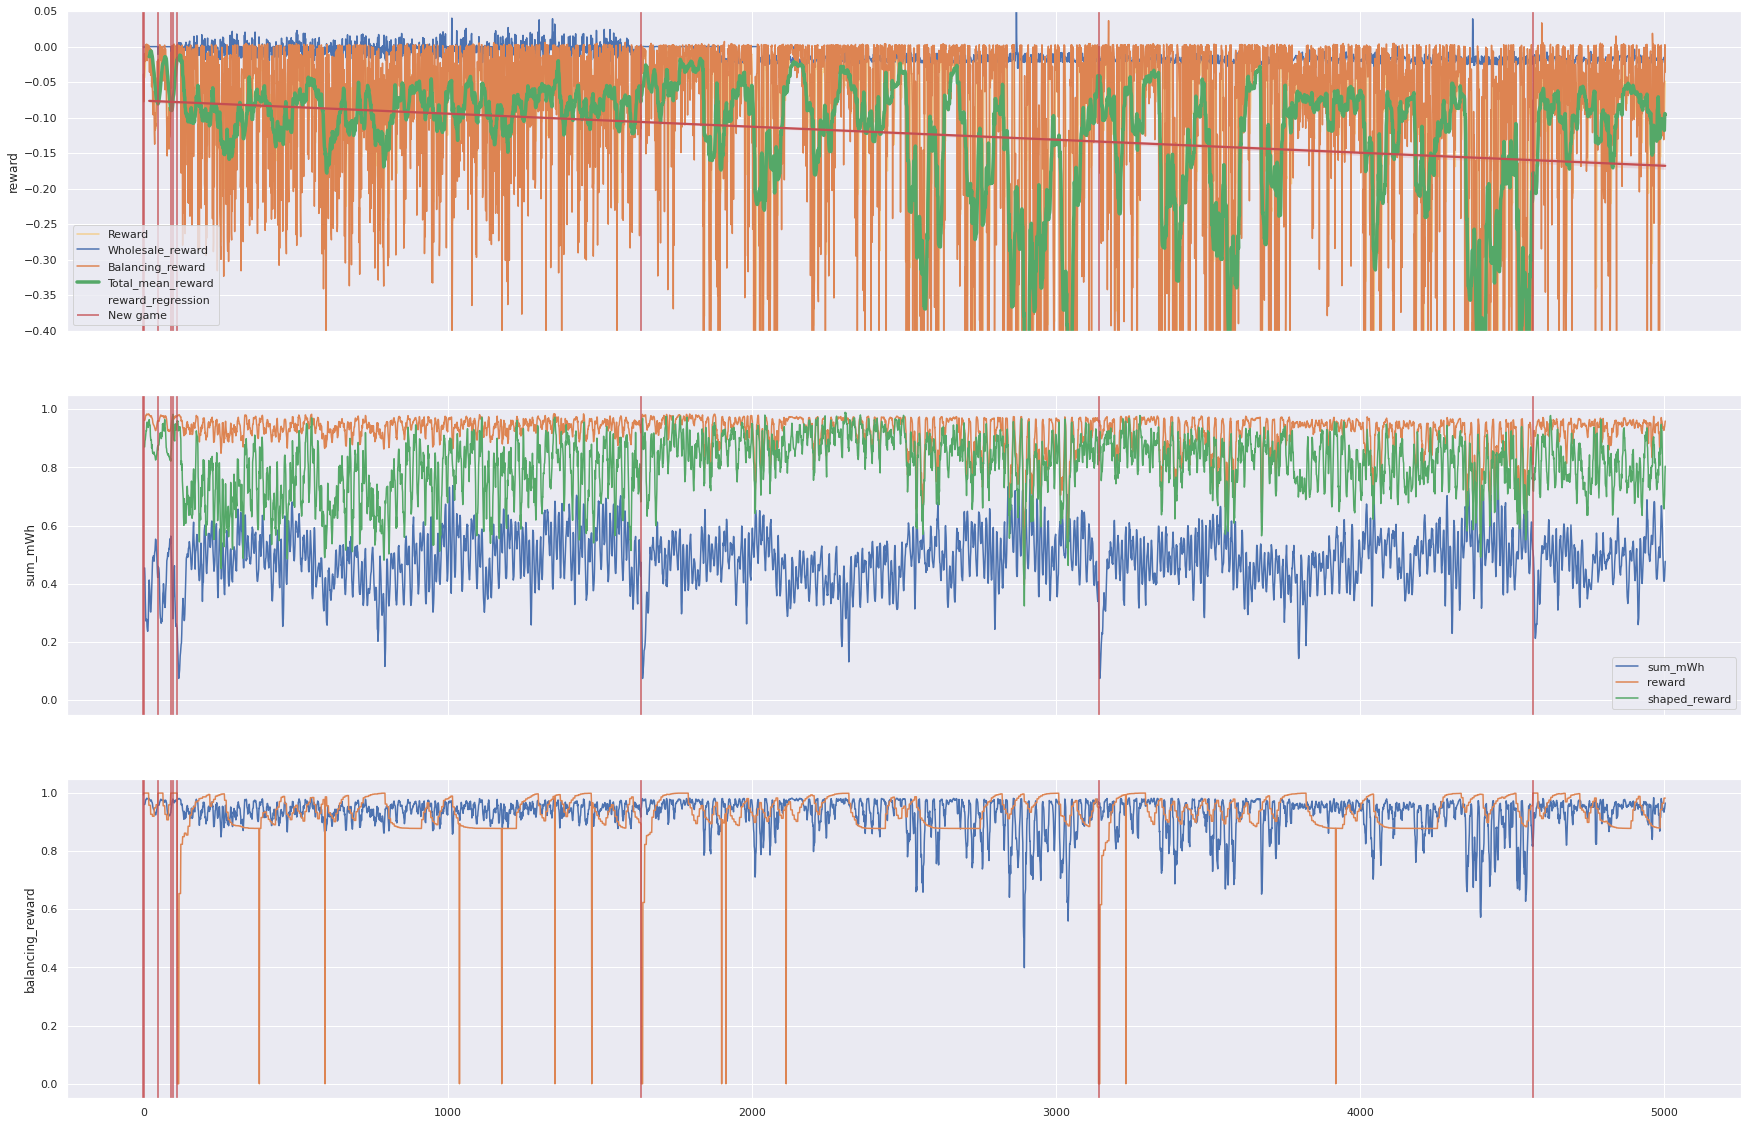

In [52]:

from cProfile import label


sns.set_theme()
sns.axes_style("darkgrid")
f, axs = plt.subplots(3, 1, sharex=True)



#graph5 = sns.lineplot(x=df_tariff_reward.index, y=df_tariff_reward, ax=axs, label="Tariff_reward")
#graph6 = sns.lineplot(x=df_shaped.index, y=df_shaped, ax=axs, label="Shaped_reward", color="green")

graph7 = sns.lineplot(x=df.index, y=df["reward"].rolling(5).mean(), color="orange", ax=axs[0], alpha=0.4, label="Reward")
graph4 = sns.lineplot(x=df_wholesale_reward.index, y=df_wholesale_reward, ax=axs[0],label="Wholesale_reward")
graph3 = sns.lineplot(x=df_balancing_reward.index, y=df_balancing_reward, ax=axs[0], label="Balancing_reward")
graph2 = sns.lineplot(x=df_reward_rolling.index, y=df_reward_rolling, ax=axs[0], label="Total_mean_reward", linewidth= 3.5)
graph8 = sns.regplot(x=df_reward_rolling.index, y=df_reward_rolling, marker="", label="reward_regression", ax=axs[0])
graph9 = sns.lineplot(x=df.index, y=min_max_scaler(df["sum_mWh"]).rolling(5).mean(), data=df, ax=axs[1], label="sum_mWh")
graph9 = sns.lineplot(x=df.index, y=min_max_scaler(df["reward"]).rolling(5).mean(), data=df, ax=axs[1], label="reward")
sns.lineplot(x=df.index, y=min_max_scaler(df["shaped_return"]).rolling(5).mean(), data=df, ax=axs[1], label="shaped_reward")
sns.lineplot(x=df.index, y=min_max_scaler(df["balancing_reward"]).rolling(5).mean(), data=df, ax=axs[2])
sns.lineplot(x=df.index, y=min_max_scaler(df["customer_count"]), data=df, ax=axs[2])


for ax in axs:
    ax.vlines(
            df[df["gameId"].shift() != df["gameId"]].index,
            0,
            1,
            transform=ax.get_xaxis_transform(),
            colors="r",
            alpha=0.9,
            label="New game",
        )
axs[0].legend()
axs[1].set_ylabel("sum_mWh")
axs[0].set_ybound(-0.4,0.05)
f.set_figwidth(30)
f.set_figheight(20)


<AxesSubplot:>

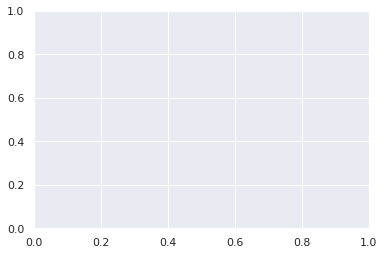

In [18]:
sns.lineplot(x=df.loc[df["gameId"] == "game25"]["reward"].index, y=df.loc[df["gameId"] == "game25"]["reward"])

In [57]:
for index, name in df[df["reward"] < 0.1].corr()["reward"].sort_values().iteritems():
    print(f"{index}, {name}")

cleared_trade_energy_23, -0.2228035816553521
cleared_trade_price_22, -0.21462718736254274
cleared_trade_price_3, -0.21318377874653793
cleared_orders_price_0, -0.18506578950627284
cleared_trade_price_23, -0.1832546315256763
cleared_trade_energy_22, -0.17567918171153865
tariff_reward, -0.17416037371701987
market_position_23, -0.16653042553596537
market_position_22, -0.16582747304430878
cleared_trade_price_7, -0.1566300388198928
cleared_trade_price_2, -0.14863081354315225
timeslot, -0.1460424695580869
cleared_trade_energy_1, -0.14577508381155413
cleared_trade_price_18, -0.14063070378184364
market_position_19, -0.14060483931980275
price_1, -0.1367643495959585
cleared_orders_energy_22, -0.13640493286121347
market_position_16, -0.1289416607063703
market_position_12, -0.12868396023871467
cleared_trade_price_6, -0.1284113637604179
cleared_trade_energy_5, -0.1278914171982715
market_position_15, -0.12656978999138174
market_position_21, -0.12641782491348455
sum_mWh, -0.12542102484538756
energy_23

In [20]:
df["gameId"]

Series([], Name: gameId, dtype: object)

In [21]:
# Or just use shift?
index_slot = 201
col_names_temp = ["reward", "customer_count"]
templist = []
for i in range(24):
    energy_price_bid = df.iloc[(index_slot - i)][[f"energy_{i+1}",f"price_{i+1}"]].values
    trade_result = df.iloc[index_slot - i-1][[f"cleared_orders_energy_{i}", f"cleared_orders_price_{i}"]].values
    market_position = df.iloc[index_slot -i][f"market_position_{i}"]
    sum_mwh = df.iloc[index_slot]["sum_mWh"]
    index_slot_list = df.iloc[index_slot-i].name
    predicted_prosumption=df.iloc[index_slot-i][f"p_customer_prosumption_{i}"]/1000
    #if i = 0:
    #    trade_result[0] = df.iloc[timeslot]["final"]
    templist.append([*energy_price_bid, *trade_result, market_position, sum_mwh, index_slot_list, predicted_prosumption])

df_action_analysis = pd.DataFrame(templist, columns=["energy_action", "price_action", "energy_orders_energy", "price_orders_energy", "market_position", "sum_mWh", "index_slot", "predicted_prosumption"])
df_action_analysis

IndexError: single positional indexer is out-of-bounds

In [ ]:
df_action_analysis.style.background_gradient(cmap="bwr")

,energy_action,price_action,energy_orders_energy,price_orders_energy,market_position,sum_mWh,index_slot,predicted_prosumption
0,49.554259,-99.495530,47.586413,-41.592302,-225.706636,9.329498,20501,-15.466758
1,-50.000000,0.000000,-50.000000,0.000000,-225.706636,9.329498,20500,-12.368693
2,49.755609,-99.889255,45.437837,-38.269324,-275.068555,9.329498,20499,-14.232984
3,-50.000000,100.000000,0.000000,0.000000,-225.068555,9.329498,20498,-11.998194
4,-50.000000,99.561846,0.000000,0.000000,-274.893220,9.329498,20497,-12.902726
5,-49.788260,99.516863,0.000000,0.000000,-274.893220,9.329498,20496,-11.288973
6,-49.908832,0.163794,-49.341881,0.182729,-274.893220,9.329498,20495,-11.049677
7,-49.098149,100.000000,0.000000,0.000000,-274.893220,9.329498,20494,-10.065958
8,50.000000,-0.000000,0.000000,0.000000,-225.551339,9.329498,20493,-6.478818
9,-50.000000,0.564858,-50.000000,0.167537,-225.551339,9.329498,20492,-5.737780


In [ ]:
i = 0
index_slot = 201
df.iloc[index_slot][[*[f"cleared_orders_energy_{i}", f"cleared_orders_price_{i}"], f"market_position_{i}", "sum_mWh", f"p_customer_prosumption_{i}"]]
#[*[f"sum_mWh", "price_1"], *["price_2", "test3"]]
#[*["test", "test2"],*["test3", "test4"]]
df["cleared_orders_energy_4"]

20300    0.000000
20301    7.030094
20302    0.000000
20303    6.777491
20304   -0.080631
           ...   
26618    0.000000
26619    0.000000
26620    0.000000
26621    0.000000
26622    0.000000
Name: cleared_orders_energy_4, Length: 6323, dtype: float64

In [ ]:
df[["price_24","energy_24"]].iloc[177]

price_24     -0.289318
energy_24    50.000000
Name: 20477, dtype: float64

In [ ]:
a = df.iloc[df.index <201][[x for x in df.columns if (x.startswith("energy_") | (x.startswith("price_")))]]
a.iloc[a.index > 170].T

""
energy_1
price_1
energy_2
price_2
energy_3
price_3
energy_4
price_4
energy_5
price_5


In [ ]:
energy_price_bid

array([50.0, -0.47714412212371826], dtype=object)

In [ ]:
for index, value in df[df.columns.difference(pd.Index(["gameId"]))].corr()["reward"].sort_values().iteritems():
    
    print(index, value)

tariff_reward -0.44008917454363516
sum_mWh -0.4240435412154156
cleared_trade_energy_1 -0.3969097865954526
price_5 -0.36403638836665386
energy_23 -0.3621390579551345
energy_3 -0.35827442865918696
price_11 -0.3577911454212473
price_19 -0.35416977381615156
energy_1 -0.35408918539456274
price_8 -0.35020000943868634
price_13 -0.34857234711417556
price_6 -0.34792413353846463
energy_21 -0.3475393751982593
price_4 -0.3466837908007861
price_17 -0.34571776866840465
cleared_trade_price_2 -0.34556569303473456
energy_24 -0.3409812238975205
price_18 -0.33205405958217626
energy_9 -0.3318496873562368
price_12 -0.3296679088946081
price_22 -0.3285250237589557
cleared_trade_energy_2 -0.31469824475085545
cleared_trade_price_0 -0.29927239855180066
timeslot -0.27889682085010065
cleared_trade_price_23 -0.2749802719454918
cleared_trade_energy_23 -0.27318440189436555
cleared_trade_energy_0 -0.19669444875599926
p_customer_prosumption_7 -0.18341347487685683
p_customer_prosumption_6 -0.17729538258265676
cleared_t

In [ ]:
df2 = pd.DataFrame()
df2["predicted_consumption_mWh"] = df["p_customer_prosumption_0"] /-1000
df2["timeslot"] = df["timeslot"]
df2["market_position_0"] = df["market_position_0"]
df2["sum_mWh"] = df["sum_mWh"]
df2["error_prediction"] = abs(df2["sum_mWh"]) - df2["predicted_consumption_mWh"]
df2

,predicted_consumption_mWh,timeslot,market_position_0,sum_mWh,error_prediction
20300,16.344934,423,134.456365,41.340556,24.995623
20301,18.906289,424,119.542913,71.047201,52.140912
20302,18.801855,425,12.055511,70.234050,51.432194
20303,12.758340,426,89.997515,59.561634,46.803294
20304,14.195230,427,173.358000,48.466750,34.271520
...,...,...,...,...,...
26618,14.594301,1551,-193.458609,41.918152,27.323851
26619,14.729000,1552,-211.765760,70.393887,55.664887
26620,14.503089,1553,-224.866790,60.093548,45.590459
26621,14.608606,1554,-195.889974,61.704056,47.095449


### Action analysis

In [ ]:
#f,axs = plt.subplots(1,1,figsize=(25,25))
#for i in range(1):
    #ax = sns.scatterplot(x=action_observation_reward_df[f"price_{i+1}"], y=action_observation_reward_df[f"energy_{i+1}"], data=action_observation_reward_df, hue="balancing_reward", ax=axs)
#    ax = sns.histplot(x=df[f"price_{i+1}"], y=df[f"energy_{i+1}"], data=df, hue="balancing_reward", ax=axs)
    

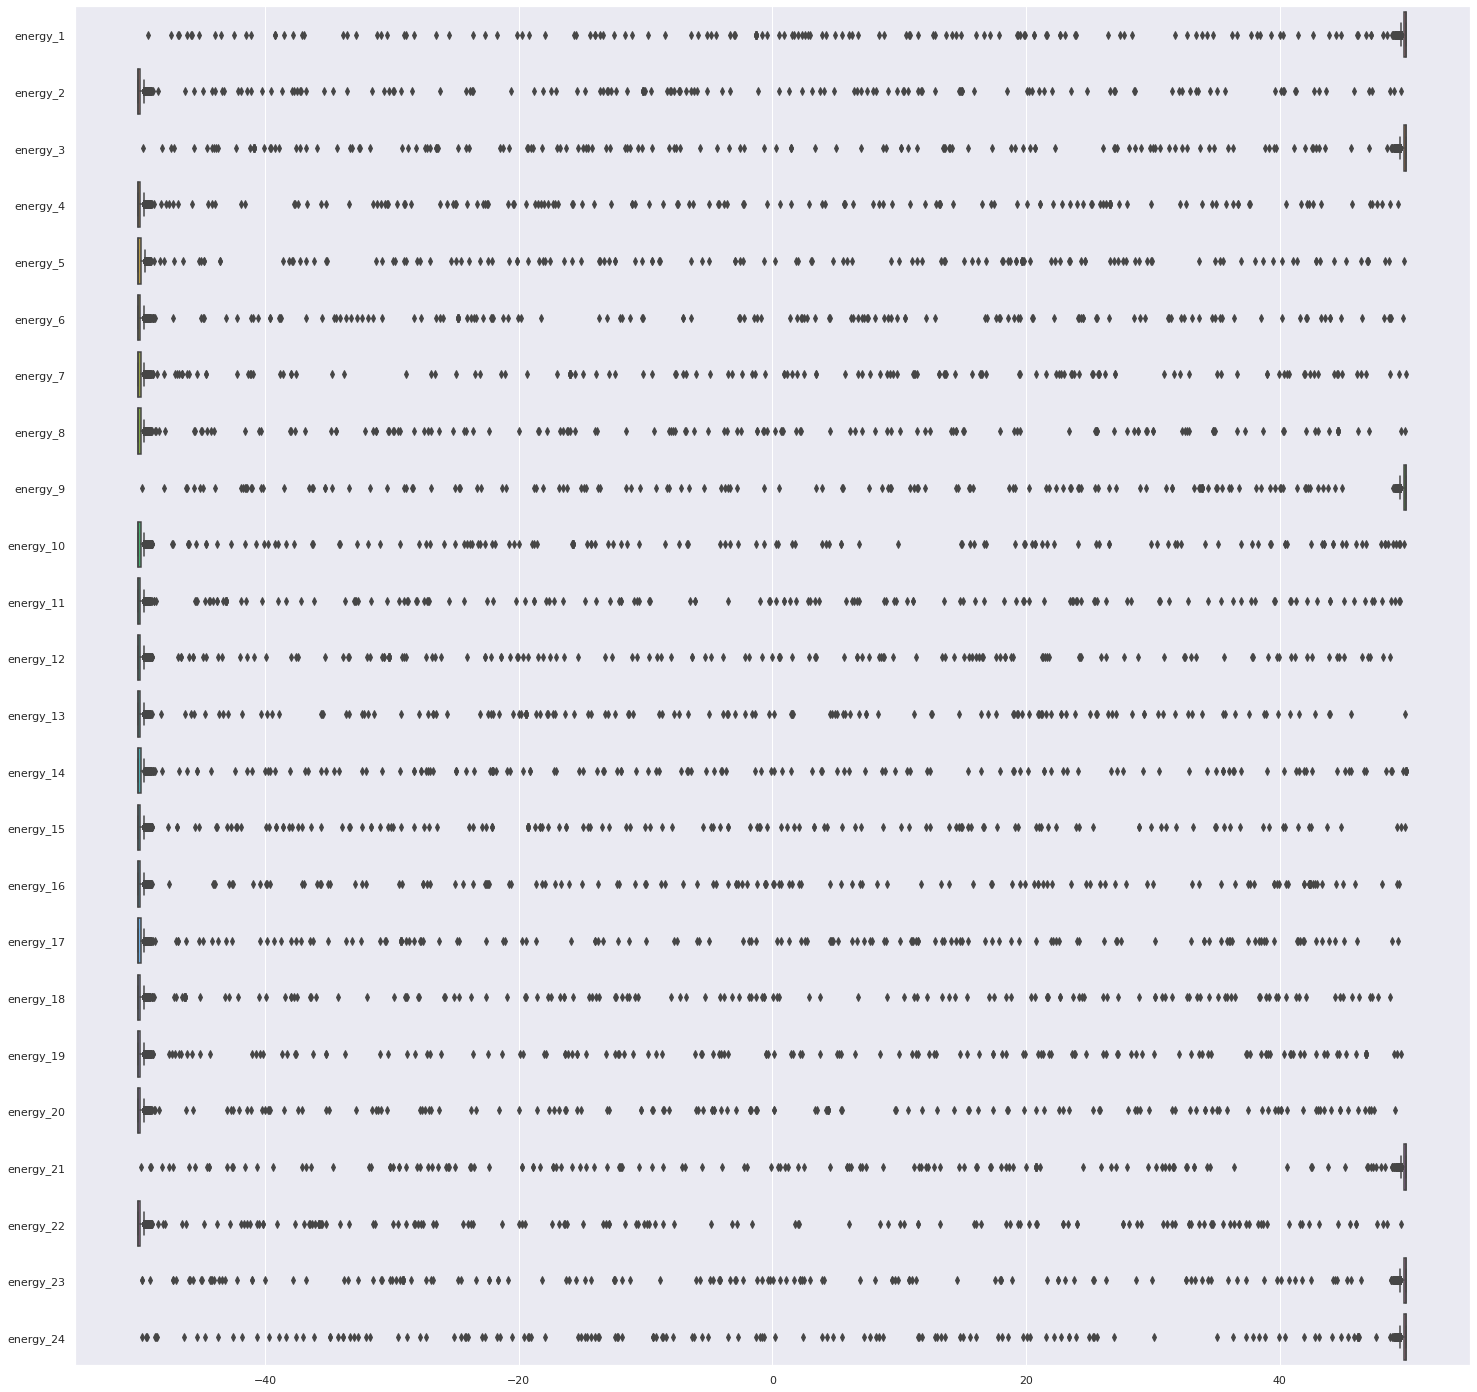

In [ ]:
plot_args= {"cut": 0}
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df[energy], orient="h")

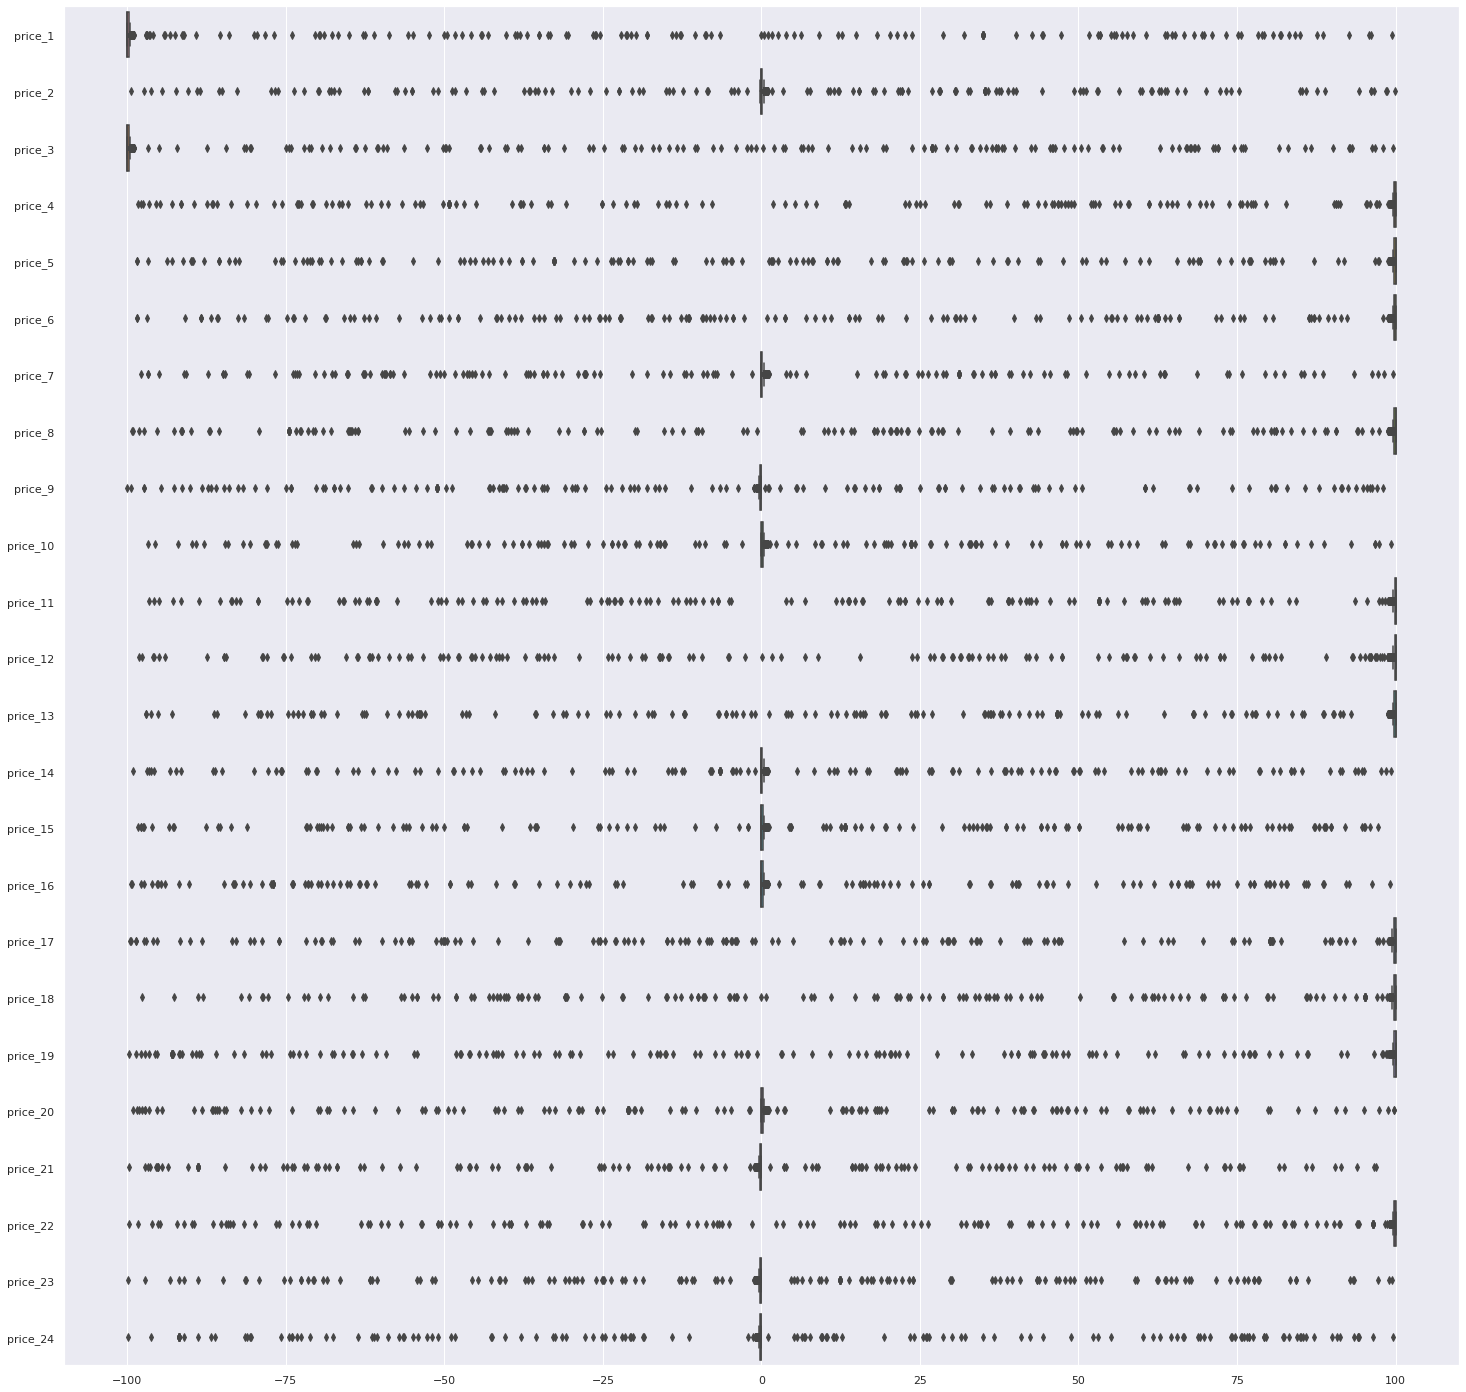

In [ ]:
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df[price],  orient="h")

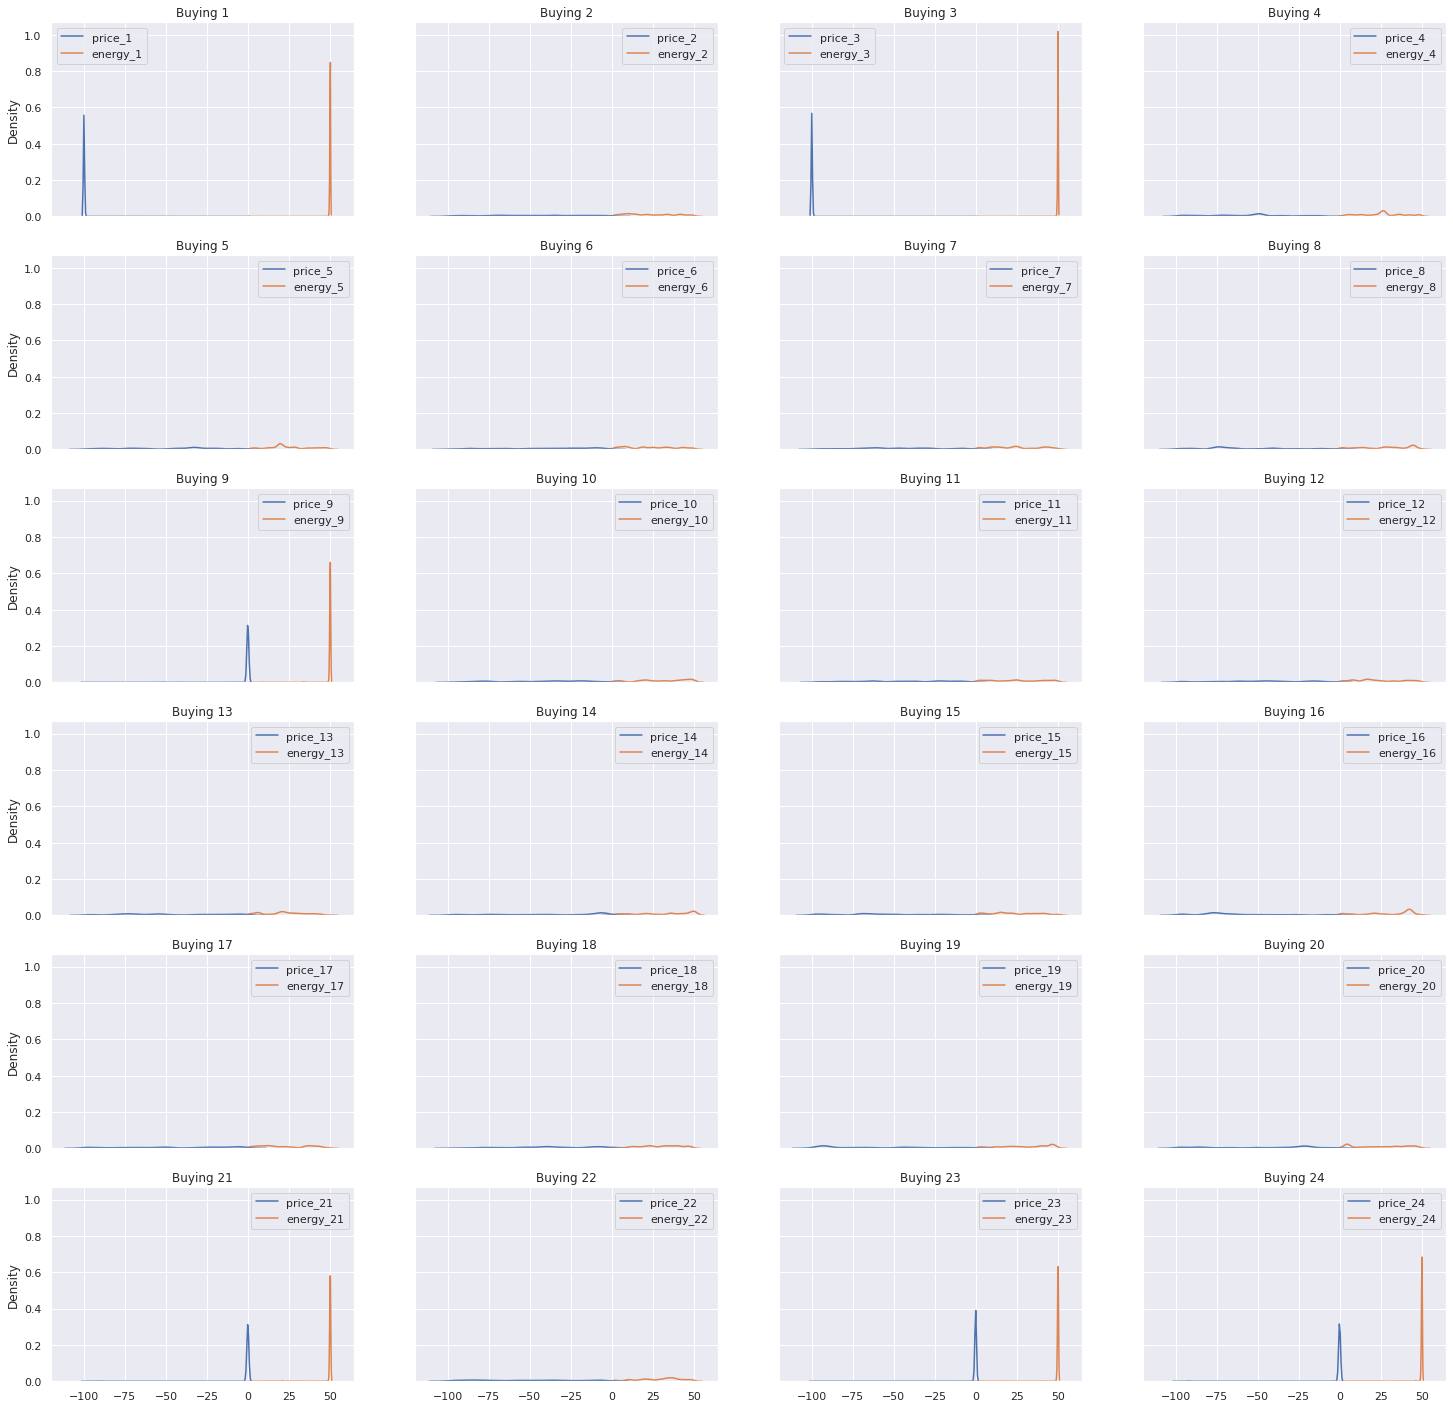

In [ ]:
f,axs = plt.subplots(6,4,figsize=(25,25) ,sharex=True, sharey=True)

for i in range(0,24,1):
    df_seleciton = df.loc[df[f"price_{i+1}"]<0]

    j = int(i/4)
    j2 = round(i%4)
    axs[j][j2].set_title(f"Buying {i+1}")
    sns.kdeplot(data=df_seleciton[[f"price_{i+1}", f"energy_{i+1}"]], ax=axs[j][j2], bw_adjust=0.3)


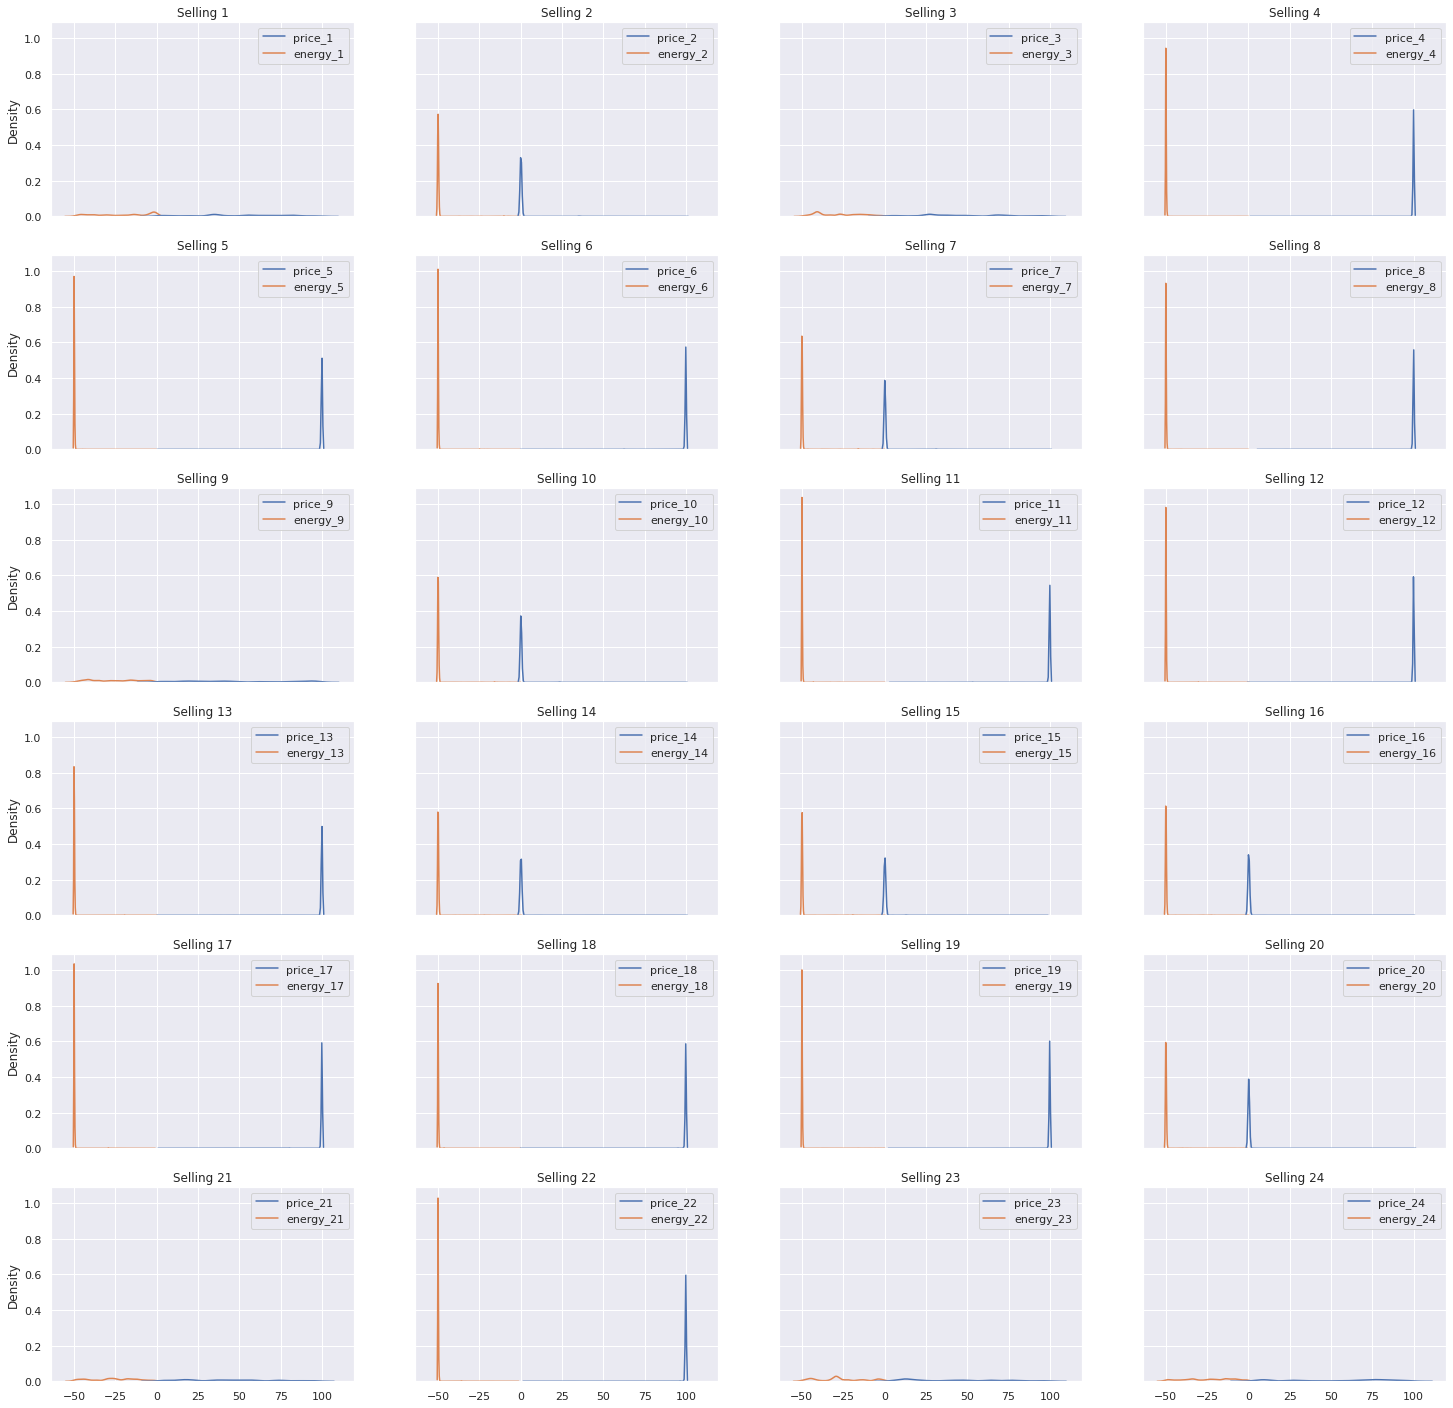

In [ ]:
# Selling
from matplotlib.pyplot import title


f,axs = plt.subplots(6,4,figsize=(25,25) ,sharex=True, sharey=True)
for i in range(0,24,1):
    df_seleciton = df.loc[df[f"price_{i+1}"]>0]

    j = int(i/4)
    j2 = round(i%4)
    axs[j][j2].set_title(f"Selling {i+1}")
    sns.kdeplot(data=df_seleciton[[f"price_{i+1}", f"energy_{i+1}"]], ax=axs[j][j2], bw_adjust=0.3)